<a href="https://colab.research.google.com/github/hsallrounder/Algorithm-For-Intelligent-Systems-And-Robotics-Lab/blob/master/Practical_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implement CNN on Cifar 10 Dataset**

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,Conv2D, MaxPool2D, Dropout
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [ ]:
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
X_train.max()

255

In [ ]:
X_train=X_train/255
X_test=X_test/255

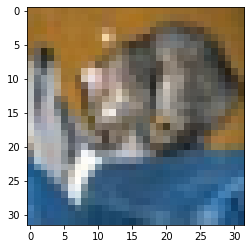

In [ ]:
plt.imshow(X_test[0])

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
X_train.shape
X_test.shape

(10000, 32, 32, 3)

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=[32,32,3]))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 85s 17ms/step - loss: 1.4740 - sparse_categorical_accuracy: 0.4736 - val_loss: 1.2007 - val_sparse_categorical_accuracy: 0.5736
Epoch 2/10
5000/5000 [==============================] - 76s 15ms/step - loss: 1.2204 - sparse_categorical_accuracy: 0.5659 - val_loss: 1.1587 - val_sparse_categorical_accuracy: 0.5940
Epoch 3/10
5000/5000 [==============================] - 75s 15ms/step - loss: 1.1176 - sparse_categorical_accuracy: 0.6030 - val_loss: 1.0884 - val_sparse_categorical_accuracy: 0.6141
Epoch 4/10
5000/5000 [==============================] - 76s 15ms/step - loss: 1.0491 - sparse_categorical_accuracy: 0.6298 - val_loss: 1.0729 - val_sparse_categorical_accuracy: 0.6254
Epoch 5/10
5000/5000 [==============================] - 75s 15ms/step - loss: 0.9971 - sparse_categorical_accuracy: 0.6473 - val_loss: 1.0923 - val_sparse_categorical_accuracy: 0.6165
Epoch 6/10
5000/5000 [==============================] - 75s 15ms/step - loss: 0.

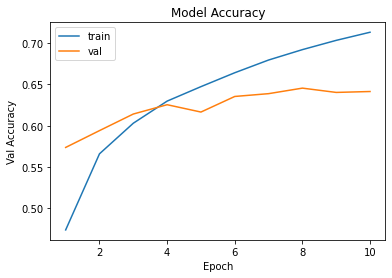

In [ ]:
epoch_range=range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Val Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

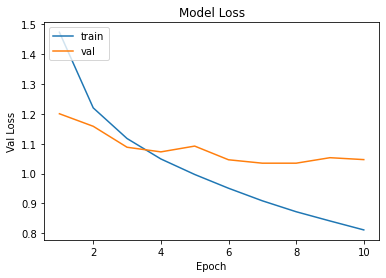

In [ ]:
epoch_range=range(1, 11)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Val Loss')
plt.xlabel('Epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [ ]:
predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
mat=confusion_matrix(y_test, y_pred)

In [ ]:
mat

array([[692,   9,  39,  17,  25,  10,  11,   7, 110,  80],
       [ 27, 714,  10,   4,   6,   7,   7,   4,  52, 169],
       [ 87,  13, 418,  57, 163,  91,  71,  55,  26,  19],
       [ 29,  12,  72, 354, 130, 220,  57,  52,  36,  38],
       [ 36,   2,  53,  48, 638,  45,  53, 103,  18,   4],
       [ 23,  10,  43, 134,  75, 573,  24,  88,  15,  15],
       [ 18,  12,  32,  56, 105,  43, 683,  15,  12,  24],
       [ 17,   2,  24,  28,  56,  83,   6, 754,   9,  21],
       [ 66,  32,   9,   8,   8,  10,   6,   8, 813,  40],
       [ 44,  80,   8,  11,   8,   5,  12,  15,  42, 775]])

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f74a00bbb90>)

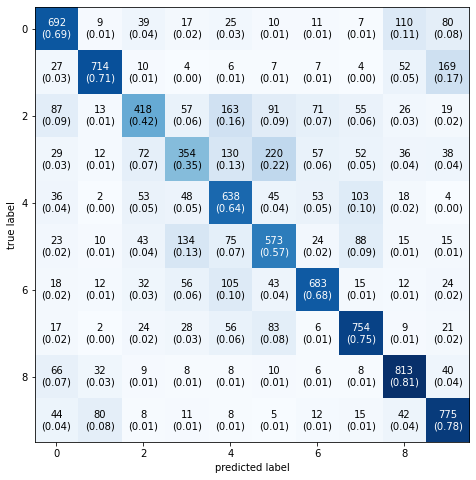

In [ ]:
plot_confusion_matrix(mat, figsize=(8,8), show_normed=True)